In [3]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
dpc_cn_avg_df = pd.read_csv("dpc_cn_2021_2022_tour_3_division_I (2).csv")
dpc_cn_avg_df.head()

,Player,Position,Total Count,Wins,Losses,Winrate,As Radiant,As Dire,Kills,Deaths,...,Avg. KAL,GPM,XPM,Last Hits,Denies,LVL,HD,TD,HH,GS
0,Zzq,5,20,10,10,50.00%,7,13,1.70,7.20,...,2.07,262,340,39,2,16,9392,185,2929,8275
1,RedPanda,5,18,8,10,44.44%,2,16,1.28,5.72,...,2.35,261,360,50,4,15,9804,208,3308,8001
2,Y`,5,18,10,8,55.56%,9,9,2.22,6.33,...,2.40,288,372,55,2,16,10836,494,6079,8218
3,皮球,5,17,11,6,64.71%,13,4,1.82,4.94,...,3.12,284,381,45,3,16,10120,233,6496,8946
4,起风 了,5,16,6,10,37.50%,7,9,1.94,5.56,...,2.20,259,322,40,2,14,8924,578,3838,7842


# Terms:

Dire / Radiant: the two sides of Dota2 teams. Dire, usually represented in color red, owns the top right half of the map, and radiant, usually represented in color blue, owns the bottom left half of the map. <br>

Position 1 - 5: 
<ol>
    <li> 1 = safe-lane carry (the carry player that plays the top lane of dire, or bottom lane of radiant. takes the most resources of the team and deals the most damage in most cases)</li>
    <li> 2 = mid-lane carry (the carry player that plays the midlane of both dire and radiant. takes about the same resources of position 1, but starts involving in teamfights earlier than position 1) </li>
    <li> 3 = off-lane carry (the carry player that plays the bottom lane of dire, or top lane of radiant. takes the least resources of carry positions, usually do stun, tank damage from opponent, and suppress opponent position 1 from farming (getting resources)) </li>
    <li> 4 = soft-support (supports position 3. takes a little resources occasionally. Do stun, teamfight initiation, lane helping etc) </li>
    <li> 5 = hard-support (supports position 1. some position 5 heroes can heal. takes the least resources in most cases) </li>
</ul>

GPM = Golds Per Minute <br>
XPM = Experience Per Minute <br>
Denies = Last hit on their own creeps <br>
HD = Hero Damage <br>
TD = Tower Damage <br>
HH = Hero Heal <br>
GS = Gold Sum <br>

# BASIC INFO

All data is gathered from https://www.datdota.com/. 

In [5]:
#basic info of the df
dpc_cn_avg_df.info

<bound method DataFrame.info of           Player  Position  Total Count  Wins  Losses Winrate  As Radiant  \
0            Zzq         5           20    10      10  50.00%           7   
1       RedPanda         5           18     8      10  44.44%           2   
2             Y`         5           18    10       8  55.56%           9   
3             皮球         5           17    11       6  64.71%          13   
4           起风 了         5           16     6      10  37.50%           7   
5             Dy         5           16     9       7  56.25%          10   
6          XNova         5           15    10       5  66.67%          11   
7         Fenrir         5            3     1       2  33.33%           1   
8         PlAnet         4           20    10      10  50.00%           7   
9             TK         4           18     8      10  44.44%           2   
10          XinQ         4           18    10       8  55.56%           9   
11            天命         4           17     

In [6]:
#df description
dpc_cn_avg_df.describe()

,Position,Total Count,Wins,Losses,As Radiant,As Dire,Kills,Deaths,Assists,KDA,Avg. KAL,GPM,XPM,Last Hits,Denies,LVL,HD,TD,HH,GS
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,3.048780,17.073171,8.536585,8.536585,8.536585,8.536585,4.333902,4.474634,10.760244,4.356585,3.933902,430.756098,527.048780,184.365854,8.560976,19.243902,16745.195122,2271.658537,1622.536585,13775.682927
std,1.448296,2.705460,2.237158,2.656102,3.309815,4.171915,2.088248,1.608652,2.006422,1.798627,1.773367,139.369792,132.265444,117.125948,5.440812,2.781910,6228.953681,2079.910402,1855.530276,4684.961139
min,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.280000,1.710000,7.280000,1.720000,1.890000,237.000000,316.000000,31.000000,2.000000,14.000000,6997.000000,108.000000,0.000000,7450.000000
25%,2.000000,16.000000,7.000000,6.000000,7.000000,4.000000,2.220000,3.000000,9.000000,2.940000,2.590000,286.000000,397.000000,58.000000,4.000000,16.000000,10836.000000,509.000000,375.000000,8946.000000
50%,3.000000,17.000000,9.000000,8.000000,9.000000,7.000000,4.600000,4.710000,10.350000,3.720000,3.290000,466.000000,562.000000,224.000000,8.000000,20.000000,15692.000000,1516.000000,1041.000000,14941.000000
75%,4.000000,18.000000,10.000000,10.000000,10.000000,11.000000,6.050000,5.610000,12.170000,5.440000,4.810000,536.000000,620.000000,272.000000,12.000000,21.000000,20984.000000,3915.000000,2266.000000,17240.000000
max,5.000000,20.000000,11.000000,12.000000,13.000000,16.000000,9.330000,7.590000,14.870000,8.190000,8.900000,666.000000,742.000000,394.000000,20.000000,23.000000,28368.000000,6743.000000,6496.000000,22521.000000


In [7]:
#check null values
dpc_cn_avg_df.isna().sum()

Player         0
Position       0
Total Count    0
Wins           0
Losses         0
Winrate        0
As Radiant     0
As Dire        0
Kills          0
Deaths         0
Assists        0
KDA            0
Avg. KAL       0
GPM            0
XPM            0
Last Hits      0
Denies         0
LVL            0
HD             0
TD             0
HH             0
GS             0
dtype: int64

In [8]:
#HD, TD, HH, AND GS are vague abbreviations. Changing names of certain columns
dpc_cn_avg_df.rename(columns = {'HD': 'Hero Damage',
                 'TD': 'Tower Damage',
                 'HH': 'Hero Heal',
                 'GS': 'Gold Sum'}, inplace = True)
print(dpc_cn_avg_df.columns)

Index(['Player', 'Position', 'Total Count', 'Wins', 'Losses', 'Winrate',
       'As Radiant', 'As Dire', 'Kills', 'Deaths', 'Assists', 'KDA',
       'Avg. KAL', 'GPM', 'XPM', 'Last Hits', 'Denies', 'LVL', 'Hero Damage',
       'Tower Damage', 'Hero Heal', 'Gold Sum'],
      dtype='object')


In [9]:
#Unique Positions
dpc_cn_avg_df['Position'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [10]:
#position 1 to 5 may be vague and unclear to non-dota players. Here I renamed each rows:
#position 1: safelane carry; position 2: midlane carry; position 3: offlane carry; position 4: soft-support(offlane-support); position 5: hard-support(safelane_support)
dpc_cn_avg_df['Position'].replace({5: 'hard-support(safelane_support)', 4: 'soft-support(offlane-support)', 3: 'offlane carry', 2: 'midlane carry', 1: 'safelane carry'}, inplace = True)
dpc_cn_avg_df.head()

,Player,Position,Total Count,Wins,Losses,Winrate,As Radiant,As Dire,Kills,Deaths,...,Avg. KAL,GPM,XPM,Last Hits,Denies,LVL,Hero Damage,Tower Damage,Hero Heal,Gold Sum
0,Zzq,hard-support(safelane_support),20,10,10,50.00%,7,13,1.70,7.20,...,2.07,262,340,39,2,16,9392,185,2929,8275
1,RedPanda,hard-support(safelane_support),18,8,10,44.44%,2,16,1.28,5.72,...,2.35,261,360,50,4,15,9804,208,3308,8001
2,Y`,hard-support(safelane_support),18,10,8,55.56%,9,9,2.22,6.33,...,2.40,288,372,55,2,16,10836,494,6079,8218
3,皮球,hard-support(safelane_support),17,11,6,64.71%,13,4,1.82,4.94,...,3.12,284,381,45,3,16,10120,233,6496,8946
4,起风 了,hard-support(safelane_support),16,6,10,37.50%,7,9,1.94,5.56,...,2.20,259,322,40,2,14,8924,578,3838,7842


In [11]:
#players count in each position
count_df = dpc_cn_avg_df.groupby(by = 'Position').count()
count_df.drop(count_df.columns[1:], axis = 1, inplace = True)
count_df

,Player
Position,
hard-support(safelane_support),9
midlane carry,8
offlane carry,8
safelane carry,8
soft-support(offlane-support),8


# General Analysis of All DPC(CN) Players in the 2021/2022 Tour 3 Division I

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'hard-support(safelane_support)'),
  Text(1, 0, 'soft-support(offlane-support)'),
  Text(2, 0, 'offlane carry'),
  Text(3, 0, 'midlane carry'),
  Text(4, 0, 'safelane carry')])

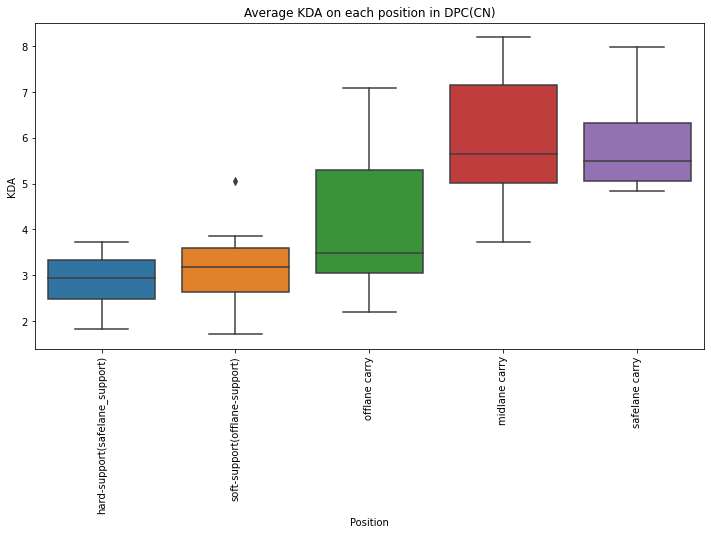

In [12]:
#average KDA(kill/death/assist) index of players in each position
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Position', y = 'KDA', data = dpc_cn_avg_df).set(title = 'Average KDA on each position in DPC(CN)')
plt.xticks(rotation = 90)

In DPC China 2021/2022 Tour 3 Division I, midlane carry players (position 2) have the highest KDA (Kill/Death/Assist) ratio. The KDA ranges the most in offlane carry players, ranging from 3 to 5.4. 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'hard-support(safelane_support)'),
  Text(1, 0, 'soft-support(offlane-support)'),
  Text(2, 0, 'offlane carry'),
  Text(3, 0, 'midlane carry'),
  Text(4, 0, 'safelane carry')])

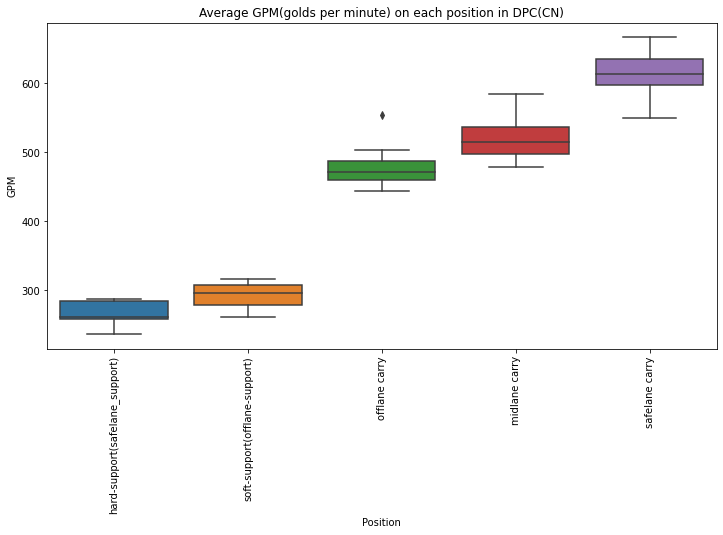

In [13]:
#average GPM index of players in each position
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Position', y = 'GPM', data = dpc_cn_avg_df).set(title = 'Average GPM(golds per minute) on each position in DPC(CN)')
plt.xticks(rotation = 90)

As for GPM (gold per minute, the index that reflects the how much resources on the map a player takes), safelane carry players take the most resources, and offlane carry players take the least among the carry positions. Position 4 and position 5 (supports) take resources much less, with a highest average GPM player at about 320. 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'hard-support(safelane_support)'),
  Text(1, 0, 'soft-support(offlane-support)'),
  Text(2, 0, 'offlane carry'),
  Text(3, 0, 'midlane carry'),
  Text(4, 0, 'safelane carry')])

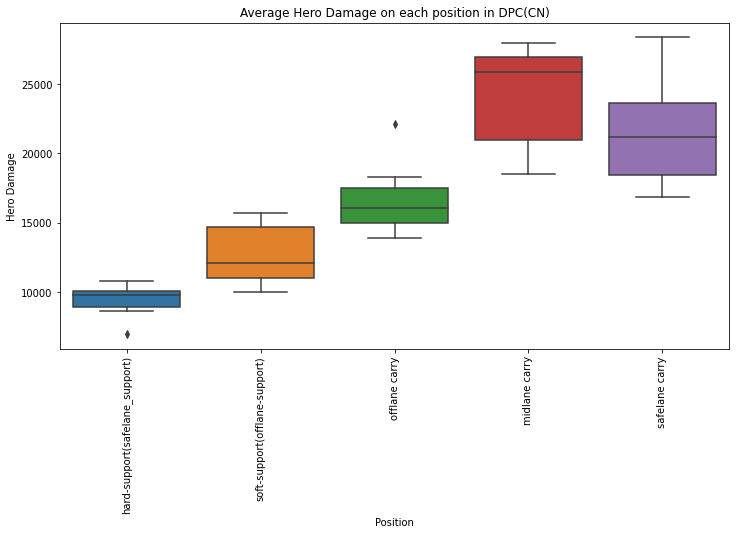

In [14]:
#average Hero Damage index of players in each position
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Position', y = 'Hero Damage', data = dpc_cn_avg_df).set(title = 'Average Hero Damage on each position in DPC(CN)')
plt.xticks(rotation = 90)

In DPC(CN) 2021/2022 Tour 3 Division I, midlane carry players generally deal the most damage. Safelane carry players' damage vary hugely ranging from 16k to almost 30k. As for offlane carry players, much less damge is done. 
This can be possibly be explained with the hero picks in Chinese teams. Position 3 players might be given with heroes with more stun and teamfight abilities instead of DPS(damage per seconds, mostly used as a reference to damage casting characters in e-sports).

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'hard-support(safelane_support)'),
  Text(1, 0, 'soft-support(offlane-support)'),
  Text(2, 0, 'offlane carry'),
  Text(3, 0, 'midlane carry'),
  Text(4, 0, 'safelane carry')])

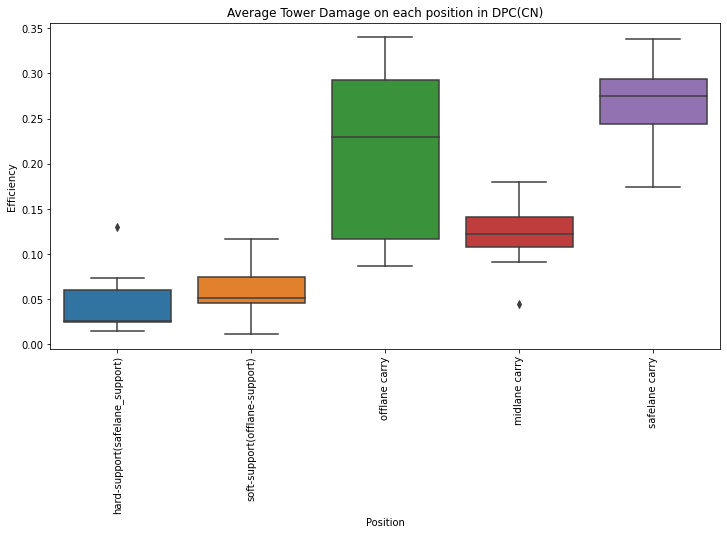

In [15]:
#average player efficiency index of players in each position
#Dota2 wins by taking down towers of the opponent team. 
#Here, the tower damage index would be calculated by dividing the average gold sum to the tower damage, which states how much gold it takes for a player to deal the most damage to the tower,
dpc_cn_avg_df['Efficiency'] = (dpc_cn_avg_df['Tower Damage']/ dpc_cn_avg_df['Gold Sum']).astype(float)
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Position', y = 'Efficiency', data = dpc_cn_avg_df).set(title = 'Average Tower Damage on each position in DPC(CN)')
plt.xticks(rotation = 90)

It can be seen from the chart above that most tower damage are done with position 3 (offlane carry), while for position 2 (midlane carry) players they deal with pushing much less. The offlane carry players, in general, take less resources and do more tower damage. More specific details can be seen in DPC CN 2021-2022 Tour 3 Division I Heroes Data Analysis. 

In [16]:
#Average minutes per game of each player (by dividing GPM from gold sum). 
#This would reflect the efficiency of each player and the optimum length of game for them to perform the best.

dpc_cn_avg_df['Average Game Length (min)'] = dpc_cn_avg_df['Gold Sum'] / dpc_cn_avg_df['GPM']

In [17]:
#Players that requires the largest game length:

max_len = dpc_cn_avg_df[['Player', 'Average Game Length (min)', 'Position', 'KDA']].nlargest(n = 5, columns = 'Average Game Length (min)')
print(max_len)

    Player  Average Game Length (min)                        Position   KDA
32  Summer                  36.408428                  safelane carry  5.00
40      SJ                  35.590717  hard-support(safelane_support)  1.83
29      Zc                  34.950617                   midlane carry  3.72
6    XNova                  34.675000  hard-support(safelane_support)  2.93
39   Ghost                  34.357262                  safelane carry  7.89


In [18]:
#Players that requires the least game length:

min_len = dpc_cn_avg_df[['Player', 'Average Game Length (min)', 'Position', 'KDA']].nsmallest(n = 5, columns = 'Average Game Length (min)')
print(min_len)

        Player  Average Game Length (min)                        Position  \
15        Yds.                  27.695167   soft-support(offlane-support)   
2           Y`                  28.534722  hard-support(safelane_support)   
14        Kaka                  29.450355   soft-support(offlane-support)   
35          萧瑟                  29.888889                  safelane carry   
19  Faith bian                  30.115308                   offlane carry   

     KDA  
15  2.22  
2   3.73  
14  2.76  
35  4.84  
19  5.28  


Player **Xnova** and **Ghost**, both from RNG, and **Summer** and **Zc**, both from DEC, have the longest average game length. This not only reflects the fact that both RNG and DEC plays a longer game than other teams, but also indicates that these players require longer game length and more farming time than others. <br>
On the other hand, **y**, **萧瑟**, and **Faith_Bian** from PSG.LGD all have the least game length on average. It partially reflects that PSG.LGD plays a faster pace game than other teams. 

# Best Players / Stand-out Players

In [19]:
#the mean of all average kills of players in Dota Pro Circuit China 2021-2022 Summer Division 1 is 4.333902, with a standard diviation of 2.088248	
mean_kill = 4.333902
std_kill = 2.088248
distinct_kill = mean_kill + std_kill

#after defining the distinct value for selecting distinct players, we list the relative important data of these players
mask = dpc_cn_avg_df['Kills'].values >= distinct_kill
distinct_players = dpc_cn_avg_df.loc[mask]
distinct_players.drop(distinct_players.columns[2:5], axis = 1, inplace = True)
print(distinct_players)

          Player        Position Winrate  As Radiant  As Dire  Kills  Deaths  \
24          Echo   midlane carry  50.00%           7       13   6.90    4.50   
26  NothingToSay   midlane carry  55.56%           9        9   6.89    3.06   
30         Eurus   midlane carry  56.25%          10        6   7.06    2.69   
31      Somnus丶M   midlane carry  66.67%          11        4   9.33    2.40   
33         Shiro  safelane carry  50.00%           7       13   6.90    3.15   
37         Monet  safelane carry  64.71%          13        4   6.71    1.71   
39         Ghost  safelane carry  66.67%          11        4   7.47    2.27   

    Assists   KDA  Avg. KAL  ...  XPM  Last Hits  Denies  LVL  Hero Damage  \
24     9.95  3.72      3.74  ...  565        232       6   21        25262   
26    10.06  8.19      5.55  ...  661        256      12   22        26750   
30    10.50  7.02      6.53  ...  649        268       8   22        26487   
31     9.93  7.55      8.03  ...  706        29

C:\Users\Dominic\AppData\Local\Temp\ipykernel_11452\4267294345.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distinct_players.drop(distinct_players.columns[2:5], axis = 1, inplace = True)


In [20]:
#top 10 players with respect to KDA index:

top_10_kda = dpc_cn_avg_df[['Player', 'Position', 'KDA', 'Winrate']].nlargest(n = 10, columns = 'KDA')
top_10_kda

,Player,Position,KDA,Winrate
26,NothingToSay,midlane carry,8.19,55.56%
37,Monet,safelane carry,7.99,64.71%
39,Ghost,safelane carry,7.89,66.67%
31,Somnus丶M,midlane carry,7.55,66.67%
20,Xxs,offlane carry,7.09,64.71%
30,Eurus,midlane carry,7.02,56.25%
28,Ori,midlane carry,5.84,64.71%
36,Ulu,safelane carry,5.79,44.44%
33,Shiro,safelane carry,5.65,50.00%
25,Xm,midlane carry,5.44,36.84%


The player that performs the best (based on KDA data) is **NothingToSay** , midlane carry player from PSG.LGD, with a winrate of 55.56. The second best midlane carry player in DPC China is **Somnus丶M** , from RNG, with a winrate of 66.67. <br>
As for safelane carry players, **Monet** from Team Aster and **Ghost** stands out from all players with KDA of 7.99 and 7.89. However, the 3rd best safelane carry player is **Ulu** from Aster.Aries, who has a KDA of 5.79, ranked at 8th in all players. It can be seen that the KDA performance of DPC CN players are mostly with midlane carry players. <br>
The only offlane carry player that made it to the top 10 KDA  is **XXS** from Team Aster. Relating to the GPM and Damage chart from above, it can be seen that DPC CN position 3 players barely plays a huge role in teamfight DPS as well as surviving. They are mostly initiating teamfights, giving out stuns, and usually not able to survive. <br>

In [21]:
top_10_kda['Winrate'] = top_10_kda['Winrate'].str.rstrip('%').astype('float') / 100.0

In [22]:
#top 10 players' winrate:
top_10_kda_wr = top_10_kda[['Player', 'Position', 'KDA', 'Winrate']].nlargest(n = 10, columns = 'Winrate')
top_10_kda_wr

,Player,Position,KDA,Winrate
39,Ghost,safelane carry,7.89,0.6667
31,Somnus丶M,midlane carry,7.55,0.6667
37,Monet,safelane carry,7.99,0.6471
20,Xxs,offlane carry,7.09,0.6471
28,Ori,midlane carry,5.84,0.6471
30,Eurus,midlane carry,7.02,0.5625
26,NothingToSay,midlane carry,8.19,0.5556
33,Shiro,safelane carry,5.65,0.5000
36,Ulu,safelane carry,5.79,0.4444
25,Xm,midlane carry,5.44,0.3684


This part is only sorting top 10 KDA players with their winrate, since players such as Ghost and Somnus丶M are both from RNG, with the same number of winning and losses. Among the top 10 players, **Xm** from VG has the lowest winrate (0.3684). 

In [153]:
top_10_rd = dpc_cn_avg_df.nlargest(n = 10, columns = 'KDA')
top_10_rd.drop(['Player', 'Position', 'Total Count', 'Wins', 'Losses', 'Winrate', 'As Radiant', 'As Dire', 'Kills', 'Deaths', 'Assists', 'Avg. KAL', 'LVL', 'Hero Heal', 'Last Hits', 'Denies'], axis = 1)
top_10_rd.reset_index()
top_10_rd

,Player,Position,Total Count,Wins,Losses,Winrate,As Radiant,As Dire,Kills,Deaths,...,XPM,Last Hits,Denies,LVL,Hero Damage,Tower Damage,Hero Heal,Gold Sum,Efficiency,Average Game Length (min)
26,NothingToSay,midlane carry,18,10,8,55.56%,9,9,6.89,3.06,...,661,256,12,22,26750,1516,153,16552,0.091590,30.880597
37,Monet,safelane carry,17,11,6,64.71%,13,4,6.71,1.71,...,675,330,17,22,20703,6743,252,19941,0.338148,31.854633
39,Ghost,safelane carry,15,10,5,66.67%,11,4,7.47,2.27,...,700,315,13,23,21609,5839,1338,20580,0.283722,34.357262
31,Somnus丶M,midlane carry,15,10,5,66.67%,11,4,9.33,2.40,...,706,297,12,23,27442,2912,597,18792,0.154960,32.178082
20,Xxs,offlane carry,17,11,6,64.71%,13,4,4.65,2.06,...,585,226,10,20,15065,4666,1371,15240,0.306168,31.618257
30,Eurus,midlane carry,16,9,7,56.25%,10,6,7.06,2.69,...,649,268,8,22,26487,1985,394,17535,0.113202,32.714552
28,Ori,midlane carry,17,11,6,64.71%,13,4,6.29,2.76,...,606,238,8,21,20864,2795,51,15557,0.179662,31.051896
36,Ulu,safelane carry,18,8,10,44.44%,2,16,6.11,2.78,...,604,273,15,21,18501,4825,30,17240,0.279872,31.345455
33,Shiro,safelane carry,20,10,10,50.00%,7,13,6.90,3.15,...,680,370,12,23,25630,5669,1041,22521,0.251721,33.968326
25,Xm,midlane carry,19,7,12,36.84%,8,11,6.05,3.00,...,615,272,10,20,20984,1878,36,16095,0.116682,30.540797


In [154]:
top_10_rd['Laning Ability'] = (top_10_rd['Last Hits'] / top_10_rd['Denies']).astype(float)
top_10_rd_data = top_10_rd.drop(['Player', 'Position', 'Total Count', 'Wins', 'Losses', 'Winrate', 'As Radiant', 'As Dire', 'Kills', 'Deaths', 'Assists', 'Avg. KAL', 'LVL', 'Hero Heal', 'Last Hits', 'Denies'], axis = 1)
top_10_rd_data

,KDA,GPM,XPM,Hero Damage,Tower Damage,Gold Sum,Efficiency,Average Game Length (min),Laning Ability
26,8.19,536,661,26750,1516,16552,0.091590,30.880597,21.333333
37,7.99,626,675,20703,6743,19941,0.338148,31.854633,19.411765
39,7.89,599,700,21609,5839,20580,0.283722,34.357262,24.230769
31,7.55,584,706,27442,2912,18792,0.154960,32.178082,24.750000
20,7.09,482,585,15065,4666,15240,0.306168,31.618257,22.600000
30,7.02,536,649,26487,1985,17535,0.113202,32.714552,33.500000
28,5.84,501,606,20864,2795,15557,0.179662,31.051896,29.750000
36,5.79,550,604,18501,4825,17240,0.279872,31.345455,18.200000
33,5.65,663,680,25630,5669,22521,0.251721,33.968326,30.833333
25,5.44,527,615,20984,1878,16095,0.116682,30.540797,27.200000


In [156]:
top_10_rd_name = top_10_rd.iloc[:, [0]].copy()
top_10_rd_name

,Player
26,NothingToSay
37,Monet
39,Ghost
31,Somnus丶M
20,Xxs
30,Eurus
28,Ori
36,Ulu
33,Shiro
25,Xm


In [165]:
#Normalilzing data

top_10_rd_data_max_scaled = top_10_rd_data.copy()

for columns in top_10_rd_data_max_scaled.columns:
    top_10_rd_data_max_scaled[columns] = top_10_rd_data_max_scaled[columns]  / top_10_rd_data_max_scaled[columns].abs().max()
    
top_10_rd_data_max_scaled = top_10_rd_data_max_scaled.multiply(10)
top_10_rd_data_max_scaled.iloc[0]

KDA                          10.000000
GPM                           8.084465
XPM                           9.362606
Hero Damage                   9.747832
Tower Damage                  2.248257
Gold Sum                      7.349585
Efficiency                    2.708585
Average Game Length (min)     8.988084
Laning Ability                6.368159
Name: 26, dtype: float64

In [166]:
nts = top_10_rd_data_max_scaled.iloc[0].tolist()
nts = np.concatenate((nts, [nts[0]]))

monet = top_10_rd_data_max_scaled.iloc[1].tolist()
monet = np.concatenate((monet, [monet[0]]))

ghost = top_10_rd_data_max_scaled.iloc[2].tolist()
ghost = np.concatenate((ghost, [ghost[0]]))

maybe = top_10_rd_data_max_scaled.iloc[3].tolist()
maybe = np.concatenate((maybe, [maybe[0]]))

xxs = top_10_rd_data_max_scaled.iloc[4].tolist()
xxs = np.concatenate((xxs, [xxs[0]]))

eurus = top_10_rd_data_max_scaled.iloc[5].tolist()
eurus = np.concatenate((eurus, [eurus[0]]))

ori = top_10_rd_data_max_scaled.iloc[6].tolist()
ori = np.concatenate((ori, [ori[0]]))

ulu = top_10_rd_data_max_scaled.iloc[7].tolist()
ulu = np.concatenate((ulu, [ulu[0]]))

shiro = top_10_rd_data_max_scaled.iloc[8].tolist()
shiro = np.concatenate((shiro, [shiro[0]]))

xm = top_10_rd_data_max_scaled.iloc[9].tolist()
xm = np.concatenate((xm, [xm[0]]))

nts

array([10.        ,  8.08446456,  9.36260623,  9.74783179,  2.24825745,
        7.34958483,  2.70858518,  8.98808436,  6.3681592 , 10.        ])

In [167]:
categories = top_10_rd_data_max_scaled.columns.tolist()
categories = np.concatenate((categories, [categories[0]]))
len(categories)

10

In [ ]:
label_placement = np.linspace(start = 0, stop = 2*np.pi, num = len(nts))

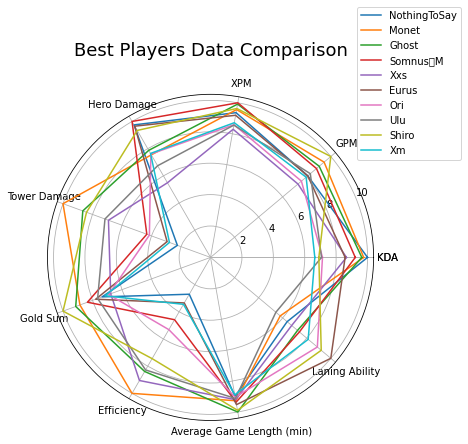

In [168]:
plt.figure(figsize = (6, 6))
plt.subplot(polar = True)
plt.plot(label_placement, nts)
plt.plot(label_placement, monet)
plt.plot(label_placement, ghost)
plt.plot(label_placement, maybe)
plt.plot(label_placement, xxs)
plt.plot(label_placement, eurus)
plt.plot(label_placement, ori)
plt.plot(label_placement, ulu)
plt.plot(label_placement, shiro)
plt.plot(label_placement, xm)
lines, labels = plt.thetagrids(np.degrees(label_placement), labels = categories)
plt.title('Best Players Data Comparison', y = 1.1, fontdict = {'fontsize': 18})
plt.legend(labels = top_10_rd_name['Player'].tolist(), loc = (0.95, 0.8))

In [68]:
#isolate 2 best midlane player comparison in the top 5 KDA chart


best_mid = dpc_cn_avg_df[(dpc_cn_avg_df['Player'] == 'NothingToSay') | (dpc_cn_avg_df['Player'] == 'Somnus丶M')].reset_index()
best_mid

,index,Player,Position,Total Count,Wins,Losses,Winrate,As Radiant,As Dire,Kills,...,XPM,Last Hits,Denies,LVL,Hero Damage,Tower Damage,Hero Heal,Gold Sum,Efficiency,Average Game Length (min)
0,26,NothingToSay,midlane carry,18,10,8,55.56%,9,9,6.89,...,661,256,12,22,26750,1516,153,16552,0.09159,30.880597
1,31,Somnus丶M,midlane carry,15,10,5,66.67%,11,4,9.33,...,706,297,12,23,27442,2912,597,18792,0.15496,32.178082


In [69]:
best_mid['Laning Ability'] = (best_mid['Last Hits'] / best_mid['Denies']).astype(float)
best_mid_data = best_mid.drop(['index', 'Player', 'Position', 'Total Count', 'Wins', 'Losses', 'Winrate', 'As Radiant', 'As Dire', 'Kills', 'Deaths', 'Assists', 'Avg. KAL', 'LVL', 'Hero Heal', 'Last Hits', 'Denies'], axis = 1)
best_mid_data

,KDA,GPM,XPM,Hero Damage,Tower Damage,Gold Sum,Efficiency,Average Game Length (min),Laning Ability
0,8.19,536,661,26750,1516,16552,0.09159,30.880597,21.333333
1,7.55,584,706,27442,2912,18792,0.15496,32.178082,24.750000


In [73]:
best_mid_name = best_mid.iloc[:, [1]].copy()
best_mid_name

,Player
0,NothingToSay
1,Somnus丶M


In [133]:
best_mid_data

,KDA,GPM,XPM,Hero Damage,Tower Damage,Gold Sum,Efficiency,Average Game Length (min),Laning Ability
0,8.19,536,661,26750,1516,16552,0.09159,30.880597,21.333333
1,7.55,584,706,27442,2912,18792,0.15496,32.178082,24.750000


In [136]:
from sklearn.preprocessing import MinMaxScaler

In [145]:
test = best_mid_data.copy().astype(float)
test

,KDA,GPM,XPM,Hero Damage,Tower Damage,Gold Sum,Efficiency,Average Game Length (min),Laning Ability
0,8.19,536.0,661.0,26750.0,1516.0,16552.0,0.09159,30.880597,21.333333
1,7.55,584.0,706.0,27442.0,2912.0,18792.0,0.15496,32.178082,24.750000


In [126]:
#Normalilzing data

best_mid_data_max_scaled = best_mid_data.copy()

for columns in best_mid_data_max_scaled.columns:
    best_mid_data_max_scaled[columns] = best_mid_data_max_scaled[columns]  / best_mid_data_max_scaled[columns].abs().max()
    
best_mid_data_max_scaled = best_mid_data_max_scaled.multiply(10)
best_mid_data_max_scaled

,KDA,GPM,XPM,Hero Damage,Tower Damage,Gold Sum,Efficiency,Average Game Length (min),Laning Ability
0,10.000000,9.178082,9.362606,9.747832,5.206044,8.808003,5.910583,9.59678,8.619529
1,9.218559,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000


In [127]:
nts = best_mid_data_max_scaled.loc[0].tolist()
nts = np.concatenate((nts, [nts[0]]))

maybe = best_mid_data_max_scaled.loc[1].tolist()
maybe = np.concatenate((maybe, [maybe[0]]))

nts

array([10.        ,  9.17808219,  9.36260623,  9.74783179,  5.20604396,
        8.80800341,  5.9105835 ,  9.59677983,  8.61952862, 10.        ])

In [128]:
categories = best_mid_data_max_scaled.columns.tolist()
categories = np.concatenate((categories, [categories[0]]))
len(categories)

10

In [129]:
label_placement = np.linspace(start = 0, stop = 2*np.pi, num = len(nts))

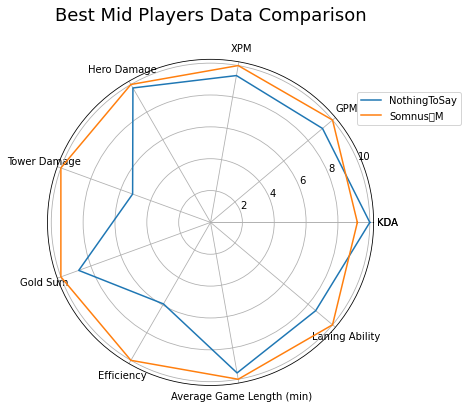

In [130]:
plt.figure(figsize = (6, 6))
plt.subplot(polar = True)
plt.plot(label_placement, nts)
plt.plot(label_placement, maybe)
lines, labels = plt.thetagrids(np.degrees(label_placement), labels = categories)
plt.title('Best Mid Players Data Comparison', y = 1.1, fontdict = {'fontsize': 18})
plt.legend(labels = best_mid_name['Player'].tolist(), loc = (0.95, 0.8))

0 Zzq 262 2.37 Zzq
1 RedPanda 261 2.94 RedPanda
2 Y` 288 3.73 Y`
3 皮球 284 3.34 皮球
4 起风 了 259 2.47 起风 了
5 Dy 286 3.43 Dy
6 XNova 280 2.93 XNova
7 Fenrir 254 2.73 Fenrir
8 PlAnet 306 3.86 PlAnet
9 TK 262 3.05 TK
10 XinQ 313 5.06 XinQ
11 天命 295 1.72 天命
12 Boboka 298 3.5 Boboka
13 Pyw 316 3.31 Pyw
14 Kaka 282 2.76 Kaka
15 Yds. 269 2.22 Yds.
16 Zeal 443 3.4 Zeal
17 Yang 463 3.11 Yang
18 ShengSi 475 2.85 ShengSi
19 Faith bian 503 5.28 Faith bian
20 Xxs 482 7.09 Xxs
21 Beyond 452 2.2 Beyond
22 ELeVeN 466 3.59 ELeVeN
23 Chalice 553 5.36 Chalice
24 Echo 478 3.72 Echo
25 Xm 527 5.44 Xm
26 NothingToSay 536 8.19 NothingToSay
27 一 501 5.44 一
28 Ori 501 5.84 Ori
29 Zc 486 3.72 Zc
30 Eurus 536 7.02 Eurus
31 Somnus丶M 584 7.55 Somnus丶M
32 Summer 617 5.0 Summer
33 Shiro 663 5.65 Shiro
34 Poyoyo 594 5.35 Poyoyo
35 萧瑟 666 4.84 萧瑟
36 Ulu 550 5.79 Ulu
37 Monet 626 7.99 Monet
38 lou 608 5.06 lou
39 Ghost 599 7.89 Ghost
40 SJ 237 1.83 SJ


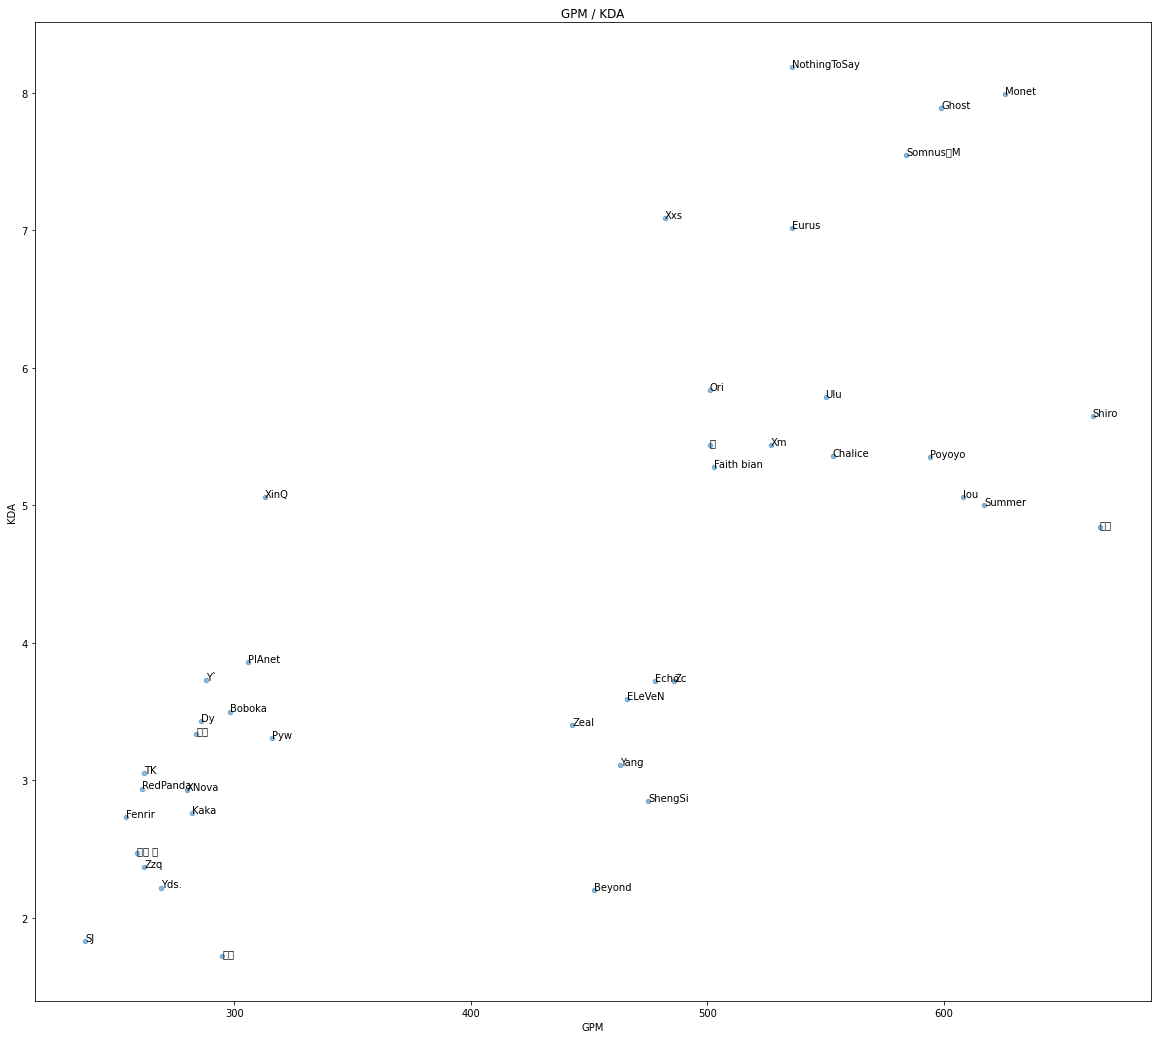

In [76]:
#Player efficiency based on GPM with KDA

a = plt.figure()
a.set_figwidth(20)
a.set_figheight(18)

plt.scatter(x = dpc_cn_avg_df['GPM'],
      y = dpc_cn_avg_df['KDA'],
      s = 20,
      alpha = 0.5)

plt.title('GPM / KDA')
plt.xlabel('GPM')
plt.ylabel('KDA')

x, y = dpc_cn_avg_df['GPM'], dpc_cn_avg_df['KDA']
for i, txt in enumerate(dpc_cn_avg_df['Player']):
  plt.annotate(txt, (x[i], y[i]))
  print(i, txt, x[i], y[i], dpc_cn_avg_df['Player'][i])

This chart shows the amount of resource a player takes and the amount of impact (here, only indicated through KDA) they created in the game.<br>
It can be seen that **NothingToSay** from PSG.LGD takes only about 540 GPM but has the highest KDA of all players. As for the player that has both a high GPM and a high KDA, **Monet** from Team Aster, **Ghost** from RNG, and **Somnus丶M** RNG both stand on the top left corner. <br>
Players that has a high GPM but is only medicre in KDA includes **Shiro** from EHOME, **萧瑟** from PSG.LGD, **Poyoyo** from VG, **lou** from XG, and **Summer** from Aster.Aries.

<AxesSubplot:title={'center':'Top 10 Player GPM'}, xlabel='Player', ylabel='Player GPM'>

C:\Users\Dominic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 33831 (\N{CJK UNIFIED IDEOGRAPH-8427}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Dominic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 29791 (\N{CJK UNIFIED IDEOGRAPH-745F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Dominic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20022 (\N{CJK UNIFIED IDEOGRAPH-4E36}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


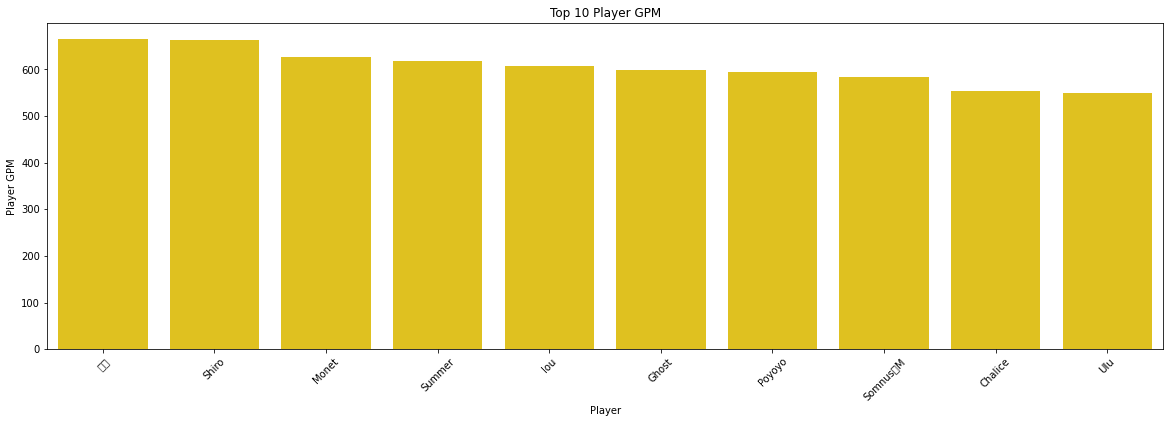

In [84]:
# top 10 Players with the highest GPM

dpc_cn_gpm = dpc_cn_avg_df.sort_values(by = 'GPM', ascending = False)[:10]
plt.figure(figsize = (20, 6))
plt.title("Top 10 Player GPM")
gpm_chart = sns.barplot(x = dpc_cn_gpm['Player'], y = dpc_cn_gpm['GPM'], label = 'Players', color = 'gold')
plt.ylabel('Player GPM')
gpm_chart.set_xticklabels(gpm_chart.get_xticklabels(), rotation = 45)
gpm_chart

From the chart, most position 1 players have the highest GPM. **萧瑟** from PSG.LGD has the highest average gpm of all Chinese DPC players. **Somnus丶M** from RNG has the highest GPM of all position 2 players.

# Position Analysis - Position 5 (Hard Support)

In [73]:
#Best Player at each position:

#isolating position 5 (hard support) players
mask_5 = dpc_cn_avg_df['Position'].values == 'hard-support(safelane_support)'
pos_5_players = dpc_cn_avg_df.loc[mask_5]
print(pos_5_players)

      Player                        Position  Total Count  Wins  Losses  \
0        Zzq  hard-support(safelane_support)           20    10      10   
1   RedPanda  hard-support(safelane_support)           18     8      10   
2         Y`  hard-support(safelane_support)           18    10       8   
3         皮球  hard-support(safelane_support)           17    11       6   
4       起风 了  hard-support(safelane_support)           16     6      10   
5         Dy  hard-support(safelane_support)           16     9       7   
6      XNova  hard-support(safelane_support)           15    10       5   
7     Fenrir  hard-support(safelane_support)            3     1       2   
40        SJ  hard-support(safelane_support)           17     5      12   

   Winrate  As Radiant  As Dire  Kills  Deaths  ...  XPM  Last Hits  Denies  \
0   50.00%           7       13   1.70    7.20  ...  340         39       2   
1   44.44%           2       16   1.28    5.72  ...  360         50       4   
2   55.56%  

In [74]:
#For position 5, the best players should be analyzed based on their general impact. 
#By dividing gold sum from hero damage, we can see the ratio of gold they consumes (resources of a team) to the actual damage (impact on the opponent team) they create. 
#I will call this index 'resource/impact ratio'
pos_5_players['resource/impact ratio'] = ((pos_5_players['Hero Damage'] + pos_5_players['Hero Heal']) / pos_5_players['Gold Sum']).astype(float)
top_pos_5_players = pos_5_players[['Player', 'KDA', 'Winrate', 'GPM', 'XPM', 'Hero Damage', 'Hero Heal', 'resource/impact ratio']].nlargest(n = 3, columns = 'resource/impact ratio')
print(top_pos_5_players)

   Player   KDA Winrate  GPM  XPM  Hero Damage  Hero Heal  \
2      Y`  3.73  55.56%  288  372        10836       6079   
40     SJ  1.83  29.41%  237  316        10215       5830   
3      皮球  3.34  64.71%  284  381        10120       6496   

    resource/impact ratio  
2                2.058287  
40               1.902193  
3                1.857366  


C:\Users\Dominic\AppData\Local\Temp\ipykernel_5416\1032153592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_5_players['resource/impact ratio'] = ((pos_5_players['Hero Damage'] + pos_5_players['Hero Heal']) / pos_5_players['Gold Sum']).astype(float)


# Position Analysis - Position 4 (Soft Support)

In [75]:
#Best Player at each position:

#isolating position 4 (Soft support) players
mask_4 = dpc_cn_avg_df['Position'].values == 'soft-support(offlane-support)'
pos_4_players = dpc_cn_avg_df.loc[mask_4]
print(pos_4_players)

    Player                       Position  Total Count  Wins  Losses Winrate  \
8   PlAnet  soft-support(offlane-support)           20    10      10  50.00%   
9       TK  soft-support(offlane-support)           18     8      10  44.44%   
10    XinQ  soft-support(offlane-support)           18    10       8  55.56%   
11      天命  soft-support(offlane-support)           17     5      12  29.41%   
12  Boboka  soft-support(offlane-support)           17    11       6  64.71%   
13     Pyw  soft-support(offlane-support)           16     9       7  56.25%   
14    Kaka  soft-support(offlane-support)           15    10       5  66.67%   
15    Yds.  soft-support(offlane-support)           19     7      12  36.84%   

    As Radiant  As Dire  Kills  Deaths  ...  XPM  Last Hits  Denies  LVL  \
8            7       13   2.90    4.95  ...  446         86       3   18   
9            2       16   2.11    5.61  ...  392         53       2   16   
10           9        9   2.83    4.94  ...  460   

In [76]:
#For position 4, the best players should be analyzed based on their assist and their general impact. 
#By dividing gold sum from hero damage, we can see the ratio of gold they consumes (resources of a team) to the actual damage (impact on the opponent team) they create. 
#I will call this index 'resource/impact ratio'
pos_4_players['resource/impact ratio'] = ((pos_4_players['Hero Damage'] + pos_4_players['Hero Heal']) / pos_4_players['Gold Sum']).astype(float)
top_pos_4_players = pos_4_players[['Player', 'KDA', 'Winrate', 'GPM', 'XPM', 'Hero Damage', 'Hero Heal', 'resource/impact ratio']].nlargest(n = 3, columns = 'resource/impact ratio')
print(top_pos_4_players)

    Player   KDA Winrate  GPM  XPM  Hero Damage  Hero Heal  \
11      天命  1.72  29.41%  295  426        15692       1239   
13     Pyw  3.31  56.25%  316  456        15013       1173   
8   PlAnet  3.86  50.00%  306  446        14610        937   

    resource/impact ratio  
11               1.805781  
13               1.606232  
8                1.583520  


C:\Users\Dominic\AppData\Local\Temp\ipykernel_5416\3353686895.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_4_players['resource/impact ratio'] = ((pos_4_players['Hero Damage'] + pos_4_players['Hero Heal']) / pos_4_players['Gold Sum']).astype(float)


# Position Analysis - Position 3 (Off-lane Carry)

In [77]:
#Best Player at each position:

#isolating position 3 (offlane carry) players
mask_3 = dpc_cn_avg_df['Position'].values == 'offlane carry'
pos_3_players = dpc_cn_avg_df.loc[mask_3]
print(pos_3_players)

        Player       Position  Total Count  Wins  Losses Winrate  As Radiant  \
16        Zeal  offlane carry           20    10      10  50.00%           7   
17        Yang  offlane carry           19     7      12  36.84%           8   
18     ShengSi  offlane carry           18     8      10  44.44%           2   
19  Faith bian  offlane carry           18    10       8  55.56%           9   
20         Xxs  offlane carry           17    11       6  64.71%          13   
21      Beyond  offlane carry           17     5      12  29.41%          10   
22      ELeVeN  offlane carry           16     9       7  56.25%          10   
23     Chalice  offlane carry           15    10       5  66.67%          11   

    As Dire  Kills  Deaths  ...  XPM  Last Hits  Denies  LVL  Hero Damage  \
16       13   4.60    5.75  ...  506        208      14   20        14779   
17       11   3.74    4.89  ...  582        217      11   20        15380   
18       16   5.56    4.17  ...  552        224 

In [78]:
#For position 3, the best players should be analyzed based on their KDA, hero damage, tower damage, as well as the resources they take (reflected from GPM and Gold Sum)
#The index would be calculated by (hero damage + tower damage / gold sum) * KDA
pos_3_players['carry index'] = ((pos_3_players['Hero Damage'] + pos_3_players['Tower Damage']) / pos_3_players['Gold Sum']).astype(float)
top_pos_3_players = pos_3_players[['Player', 'KDA', 'Winrate', 'Hero Damage', 'Tower Damage', 'Gold Sum', 'carry index']].nlargest(n = 3, columns = 'carry index')
print(top_pos_3_players)

     Player   KDA Winrate  Hero Damage  Tower Damage  Gold Sum  carry index
23  Chalice  5.36  66.67%        22103          5976     17578     1.597394
18  ShengSi  2.85  44.44%        18329          1277     14816     1.323299
16     Zeal  3.40  50.00%        14779          3821     14086     1.320460


C:\Users\Dominic\AppData\Local\Temp\ipykernel_5416\3398803657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_3_players['carry index'] = ((pos_3_players['Hero Damage'] + pos_3_players['Tower Damage']) / pos_3_players['Gold Sum']).astype(float)


# Position Analysis - Position 2 (Mid-lane Carry)

In [79]:
#Best Player at each position:

#isolating position 2 (midlane carry) players
mask_2 = dpc_cn_avg_df['Position'].values == 'midlane carry'
pos_2_players = dpc_cn_avg_df.loc[mask_2]
print(pos_2_players)

          Player       Position  Total Count  Wins  Losses Winrate  \
24          Echo  midlane carry           20    10      10  50.00%   
25            Xm  midlane carry           19     7      12  36.84%   
26  NothingToSay  midlane carry           18    10       8  55.56%   
27             一  midlane carry           18     8      10  44.44%   
28           Ori  midlane carry           17    11       6  64.71%   
29            Zc  midlane carry           17     5      12  29.41%   
30         Eurus  midlane carry           16     9       7  56.25%   
31      Somnus丶M  midlane carry           15    10       5  66.67%   

    As Radiant  As Dire  Kills  Deaths  ...  XPM  Last Hits  Denies  LVL  \
24           7       13   6.90    4.50  ...  565        232       6   21   
25           8       11   6.05    3.00  ...  615        272      10   20   
26           9        9   6.89    3.06  ...  661        256      12   22   
27           2       16   5.67    2.56  ...  613        266      

In [80]:
#For position 2, the best players should be analyzed based on their KDA, hero damage, tower damage, as well as the resources they take (reflected from GPM and Gold Sum)
#The index would be calculated by (hero damage + tower damage / gold sum) * KDA
pos_2_players['carry index'] = ((pos_2_players['Hero Damage'] + pos_2_players['Tower Damage']) / pos_2_players['Gold Sum']).astype(float)
top_pos_2_players = pos_2_players[['Player', 'KDA', 'Winrate', 'Hero Damage', 'Tower Damage', 'Gold Sum', 'carry index']].nlargest(n = 3, columns = 'carry index')
print(top_pos_2_players)

          Player   KDA Winrate  Hero Damage  Tower Damage  Gold Sum  \
24          Echo  3.72  50.00%        25262          2110     15546   
26  NothingToSay  8.19  55.56%        26750          1516     16552   
29            Zc  3.72  29.41%        27969           758     16986   

    carry index  
24     1.760710  
26     1.707709  
29     1.691216  


C:\Users\Dominic\AppData\Local\Temp\ipykernel_5416\1646841894.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_2_players['carry index'] = ((pos_2_players['Hero Damage'] + pos_2_players['Tower Damage']) / pos_2_players['Gold Sum']).astype(float)


# Position Analysis - Position 1 (Safe-lane Carry)

In [81]:
#Best Player at each position:

#isolating position 1 (safelane carry) players
mask_1 = dpc_cn_avg_df['Position'].values == 'safelane carry'
pos_1_players = dpc_cn_avg_df.loc[mask_1]
print(pos_1_players)

    Player        Position  Total Count  Wins  Losses Winrate  As Radiant  \
32  Summer  safelane carry           17     5      12  29.41%          10   
33   Shiro  safelane carry           20    10      10  50.00%           7   
34  Poyoyo  safelane carry           19     7      12  36.84%           8   
35      萧瑟  safelane carry           18    10       8  55.56%           9   
36     Ulu  safelane carry           18     8      10  44.44%           2   
37   Monet  safelane carry           17    11       6  64.71%          13   
38     lou  safelane carry           16     9       7  56.25%          10   
39   Ghost  safelane carry           15    10       5  66.67%          11   

    As Dire  Kills  Deaths  ...  XPM  Last Hits  Denies  LVL  Hero Damage  \
32        7   5.53    3.82  ...  698        394      14   23        28368   
33       13   6.90    3.15  ...  680        370      12   23        25630   
34       11   5.16    2.95  ...  675        318      15   21        18210  

In [82]:
#For position 1, the best players should be analyzed based on their KDA, hero damage, tower damage, as well as the resources they take (reflected from GPM and Gold Sum)
#The index would be calculated by (hero damage + tower damage / gold sum) * KDA
pos_1_players['carry index'] = ((pos_1_players['Hero Damage'] + pos_1_players['Tower Damage']) / pos_1_players['Gold Sum']).astype(float)
top_pos_1_players = pos_1_players[['Player', 'KDA', 'Winrate', 'Hero Damage', 'Tower Damage', 'Gold Sum', 'carry index']].nlargest(n = 3, columns = 'carry index')
print(top_pos_1_players)

    Player   KDA Winrate  Hero Damage  Tower Damage  Gold Sum  carry index
32  Summer  5.00  29.41%        28368          3915     22464     1.437099
35      萧瑟  4.84  55.56%        22968          5376     19906     1.423892
33   Shiro  5.65  50.00%        25630          5669     22521     1.389770


C:\Users\Dominic\AppData\Local\Temp\ipykernel_5416\2148039120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_1_players['carry index'] = ((pos_1_players['Hero Damage'] + pos_1_players['Tower Damage']) / pos_1_players['Gold Sum']).astype(float)
